# Overview of GALAH+~DR3, compared with IRFM Temperatures

## Author(s): Sven Buder (SB, WG4)


### History:
200803 SB Created

In [1]:
# Preamble for notebook 

# Compatibility with Python 3
from __future__ import (absolute_import, division, print_function)

try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

# Basic packages
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import glob
import sys
import os
import scipy
import pandas as pd
from astropy.table import Table, hstack, vstack, join
from itertools import combinations, product
from tqdm.notebook import tqdm

from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy import coordinates

# Matplotlib and associated packages for plotting
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.transforms import Bbox,TransformedBbox
from matplotlib.image import BboxImage
from matplotlib.legend_handler import HandlerBase
from matplotlib._png import read_png
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors

params = {
    'font.family'        : 'sans',
    'font.size'          : 17,
    'axes.labelsize'     : 20,
    'ytick.labelsize'    : 16,
    'xtick.labelsize'    : 16,
    'legend.fontsize'    : 20,
    'text.usetex'        : True, 
    'text.latex.preamble': [r'\usepackage{upgreek}', r'\usepackage{amsmath}'],
    }   
plt.rcParams.update(params)

_parula_data = [[0.2081, 0.1663, 0.5292], 
                [0.2116238095, 0.1897809524, 0.5776761905], 
                [0.212252381, 0.2137714286, 0.6269714286], 
                [0.2081, 0.2386, 0.6770857143], 
                [0.1959047619, 0.2644571429, 0.7279], 
                [0.1707285714, 0.2919380952, 0.779247619], 
                [0.1252714286, 0.3242428571, 0.8302714286], 
                [0.0591333333, 0.3598333333, 0.8683333333], 
                [0.0116952381, 0.3875095238, 0.8819571429], 
                [0.0059571429, 0.4086142857, 0.8828428571], 
                [0.0165142857, 0.4266, 0.8786333333], 
                [0.032852381, 0.4430428571, 0.8719571429], 
                [0.0498142857, 0.4585714286, 0.8640571429], 
                [0.0629333333, 0.4736904762, 0.8554380952], 
                [0.0722666667, 0.4886666667, 0.8467], 
                [0.0779428571, 0.5039857143, 0.8383714286], 
                [0.079347619, 0.5200238095, 0.8311809524], 
                [0.0749428571, 0.5375428571, 0.8262714286], 
                [0.0640571429, 0.5569857143, 0.8239571429], 
                [0.0487714286, 0.5772238095, 0.8228285714], 
                [0.0343428571, 0.5965809524, 0.819852381], 
                [0.0265, 0.6137, 0.8135], 
                [0.0238904762, 0.6286619048, 0.8037619048], 
                [0.0230904762, 0.6417857143, 0.7912666667], 
                [0.0227714286, 0.6534857143, 0.7767571429], 
                [0.0266619048, 0.6641952381, 0.7607190476], 
                [0.0383714286, 0.6742714286, 0.743552381], 
                [0.0589714286, 0.6837571429, 0.7253857143], 
                [0.0843, 0.6928333333, 0.7061666667], 
                [0.1132952381, 0.7015, 0.6858571429], 
                [0.1452714286, 0.7097571429, 0.6646285714], 
                [0.1801333333, 0.7176571429, 0.6424333333], 
                [0.2178285714, 0.7250428571, 0.6192619048], 
                [0.2586428571, 0.7317142857, 0.5954285714], 
                [0.3021714286, 0.7376047619, 0.5711857143], 
                [0.3481666667, 0.7424333333, 0.5472666667], 
                [0.3952571429, 0.7459, 0.5244428571], 
                [0.4420095238, 0.7480809524, 0.5033142857], 
                [0.4871238095, 0.7490619048, 0.4839761905], 
                [0.5300285714, 0.7491142857, 0.4661142857], 
                [0.5708571429, 0.7485190476, 0.4493904762],
                [0.609852381, 0.7473142857, 0.4336857143], 
                [0.6473, 0.7456, 0.4188], 
                [0.6834190476, 0.7434761905, 0.4044333333], 
                [0.7184095238, 0.7411333333, 0.3904761905], 
                [0.7524857143, 0.7384, 0.3768142857], 
                [0.7858428571, 0.7355666667, 0.3632714286], 
                [0.8185047619, 0.7327333333, 0.3497904762], 
                [0.8506571429, 0.7299, 0.3360285714], 
                [0.8824333333, 0.7274333333, 0.3217], 
                [0.9139333333, 0.7257857143, 0.3062761905], 
                [0.9449571429, 0.7261142857, 0.2886428571], 
                [0.9738952381, 0.7313952381, 0.266647619], 
                [0.9937714286, 0.7454571429, 0.240347619], 
                [0.9990428571, 0.7653142857, 0.2164142857], 
                [0.9955333333, 0.7860571429, 0.196652381], 
                [0.988, 0.8066, 0.1793666667], 
                [0.9788571429, 0.8271428571, 0.1633142857], 
                [0.9697, 0.8481380952, 0.147452381], 
                [0.9625857143, 0.8705142857, 0.1309], 
                [0.9588714286, 0.8949, 0.1132428571], 
                [0.9598238095, 0.9218333333, 0.0948380952], 
                [0.9661, 0.9514428571, 0.0755333333], 
                [0.9763, 0.9831, 0.0538]]

parula = ListedColormap(_parula_data, name='parula')
parula_zero = _parula_data[0]
parula_0 = ListedColormap(_parula_data, name='parula_0')
parula_0.set_bad((1,1,1))
parula_r = ListedColormap(_parula_data[::-1], name='parula_r')

willi_blau = [0.0722666667, 0.4886666667, 0.8467]

In [2]:
dr3 = Table.read('../../../catalogs/GALAH_DR3_main_200604_clean_v2.fits')

$-95_{-119}^{+128}$
$-102_{-120}^{+129}$


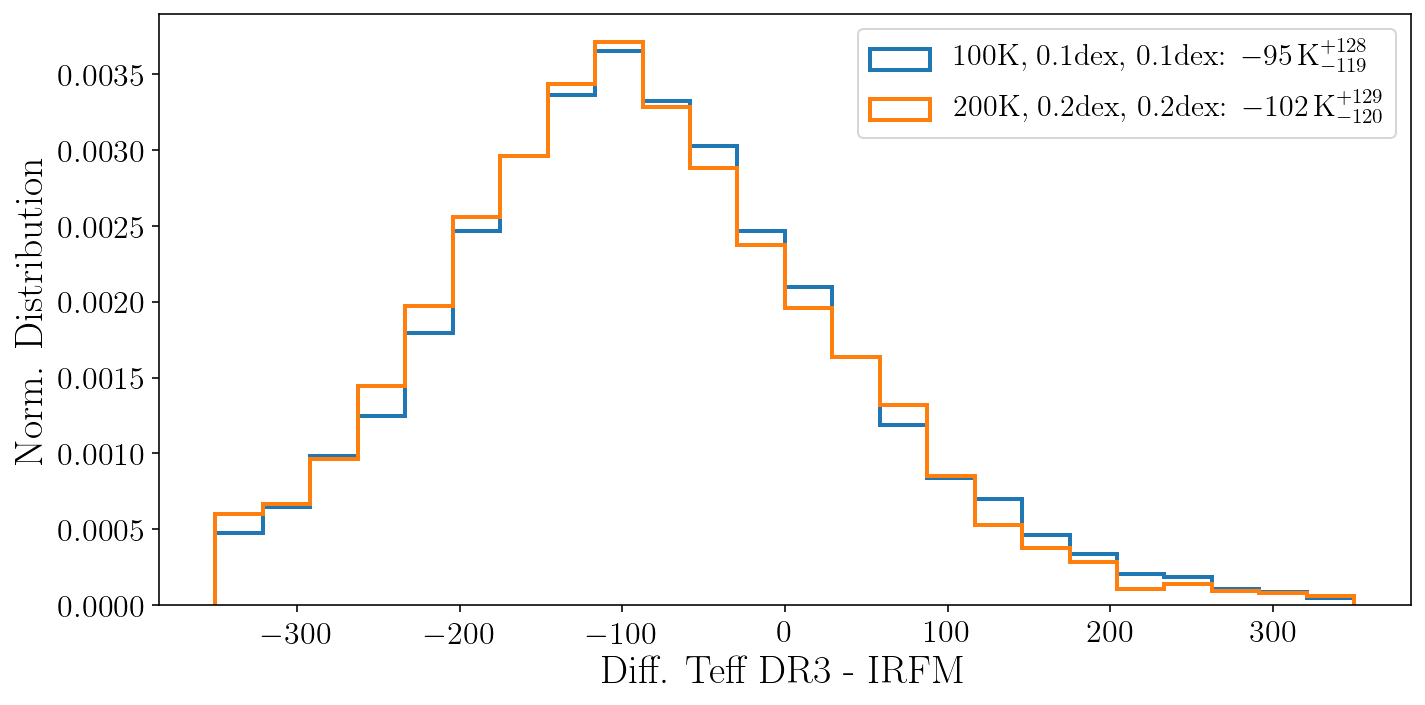

In [3]:
solar_like = (
    np.isfinite(dr3['irfm_teff']) &
    (dr3['irfm_ebv'] <0.15) &
    (np.abs(dr3['teff'] - 5777) < 200) &
    (np.abs(dr3['logg'] - 4.44) < 0.2) &
    (np.abs(dr3['fe_h'] - 0.00) < 0.2)
)

solar_like2 = (
    np.isfinite(dr3['irfm_teff']) &
    (dr3['irfm_ebv'] <0.15) &
    (np.abs(dr3['teff'] - 5777) < 100) &
    (np.abs(dr3['logg'] - 4.44) < 0.1) &
    (np.abs(dr3['fe_h'] - 0.00) < 0.1)
)

perc = np.round(np.percentile(dr3['teff'][solar_like]-dr3['irfm_teff'][solar_like],q=[16,50,84]))
perc2 = np.round(np.percentile(dr3['teff'][solar_like2]-dr3['irfm_teff'][solar_like2],q=[16,50,84]))

print(r'$'+str(int(perc[1]))+'_{-'+str(int(perc[1]-perc[0]))+'}^{+'+str(int(perc[2]-perc[1]))+'}$')
print(r'$'+str(int(perc2[1]))+'_{-'+str(int(perc2[1]-perc2[0]))+'}^{+'+str(int(perc2[2]-perc2[1]))+'}$')

plt.figure(figsize=(10,5))
kwargs = dict(bins=np.linspace(-350,350,25),density=1,histtype='step',lw=2)
plt.hist(dr3['teff'][solar_like]-dr3['irfm_teff'][solar_like],label=r'100K, 0.1dex, 0.1dex: $'+str(int(perc[1]))+'\,\mathrm{K}_{-'+str(int(perc[1]-perc[0]))+'}^{+'+str(int(perc[2]-perc[1]))+'}$',**kwargs);
plt.hist(dr3['teff'][solar_like2]-dr3['irfm_teff'][solar_like2],label=r'200K, 0.2dex, 0.2dex: $'+str(int(perc2[1]))+'\,\mathrm{K}_{-'+str(int(perc2[1]-perc2[0]))+'}^{+'+str(int(perc2[2]-perc2[1]))+'}$',**kwargs);
plt.xlabel('Diff. Teff DR3 - IRFM')
plt.ylabel('Norm. Distribution');
plt.legend(loc='upper right',fontsize=15)
plt.tight_layout()
plt.savefig('IRFM_Diff_SolarLike.png',dpi=200,bbox_inches='tight')


[-7.39427928e-06 -1.60093537e-09]
-127.1538001029097


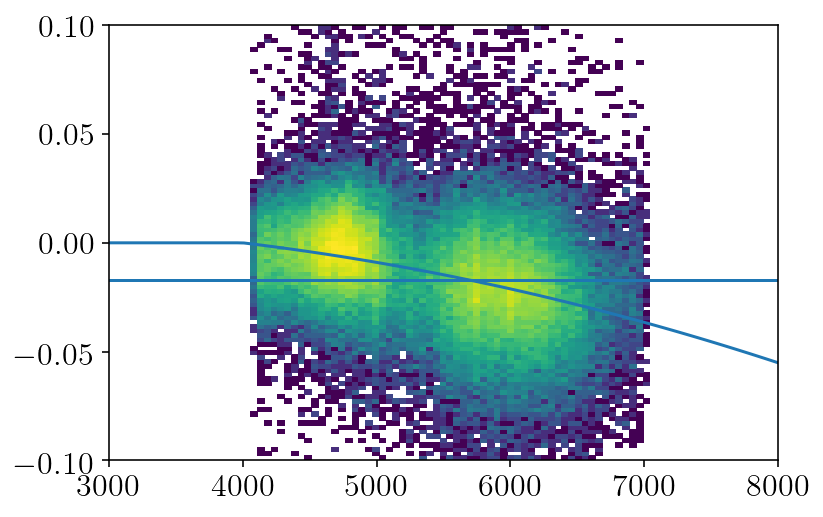

In [183]:
from scipy.optimize import curve_fit
use = np.isfinite(dr3['irfm_teff']) & (dr3['irfm_ebv'] < 0.15) & (dr3['snr_c2_iraf'] >50) & (dr3['flag_sp'] == 0) & (dr3['teff'] <7000)

plt.hist2d(
    dr3['teff'][use],
    (dr3['teff'][use]-dr3['irfm_teff'][use])/dr3['teff'][use],
    cmin=1,
    bins=(np.linspace(3000,8000,100),np.linspace(-0.1,0.1,100)),
    norm=LogNorm()
);

def diff(teff,c2,c3):
    return np.array((teff-4000)*c2 + (teff-4000)**2*c3)
popt,cov = curve_fit(diff,dr3['teff'][use],(dr3['teff'][use]-dr3['irfm_teff'][use])/dr3['teff'][use])
print(popt)
plt.plot(np.linspace(3000,8000,100),np.min([0*np.linspace(3000,8000,100),diff(np.linspace(3000,8000,100),*popt)],axis=0))
plt.axhline(-0.017)
print(diff(6000,*popt)*6000)

4250: $-16_{-65}^{+68}$
4500: $-8_{-70}^{+69}$
4750: $-2_{-77}^{+77}$
5000: $-7_{-91}^{+98}$
5250: $17_{-140}^{+193}$
Gaints: $-6_{-78}^{+80}$


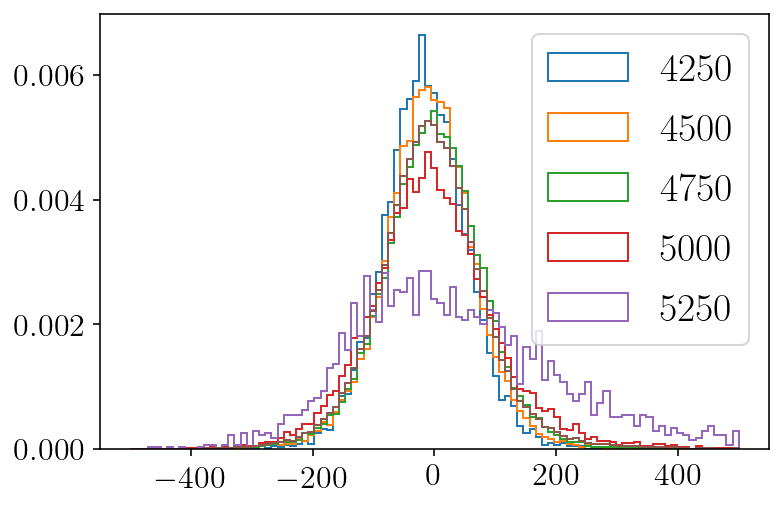

In [4]:
teff_steps = 250

for teff_bin in np.arange(4250,5500,teff_steps):
    in_bin = (
        (dr3['flag_sp'] == 0) & 
        (dr3['irfm_ebv'] < 0.15) &
        np.isfinite(dr3['irfm_teff']) &
        (dr3['teff'] < 5550+teff_steps) &
        (dr3['logg'] < 3.5) &
        (np.abs(dr3['teff'] - teff_bin) <= teff_steps/2.)
    )
    perc = np.round(np.percentile(dr3['teff'][in_bin]-dr3['irfm_teff'][in_bin],q=[16,50,84]))
    plt.hist(dr3['teff'][in_bin]-dr3['irfm_teff'][in_bin],bins=np.linspace(-500,500,100),histtype='step',density=True,
        label=str(teff_bin))
    print(str(teff_bin)+r': $'+str(int(perc[1]))+'_{-'+str(int(perc[1]-perc[0]))+'}^{+'+str(int(perc[2]-perc[1]))+'}$')

giants = (dr3['flag_sp'] == 0) & (dr3['irfm_ebv'] < 0.15) & np.isfinite(dr3['irfm_teff']) & (dr3['teff'] < 5550) & (dr3['logg'] < 3.5)
perc = np.round(np.percentile(dr3['teff'][giants]-dr3['irfm_teff'][giants],q=[16,50,84]))
plt.hist(dr3['teff'][giants]-dr3['irfm_teff'][giants],bins=np.linspace(-500,500,100),histtype='step',density=True)
plt.legend()
print(r'Gaints: $'+str(int(perc[1]))+'_{-'+str(int(perc[1]-perc[0]))+'}^{+'+str(int(perc[2]-perc[1]))+'}$')

No handles with labels found to put in legend.


RC: $2_{-75}^{+74}$


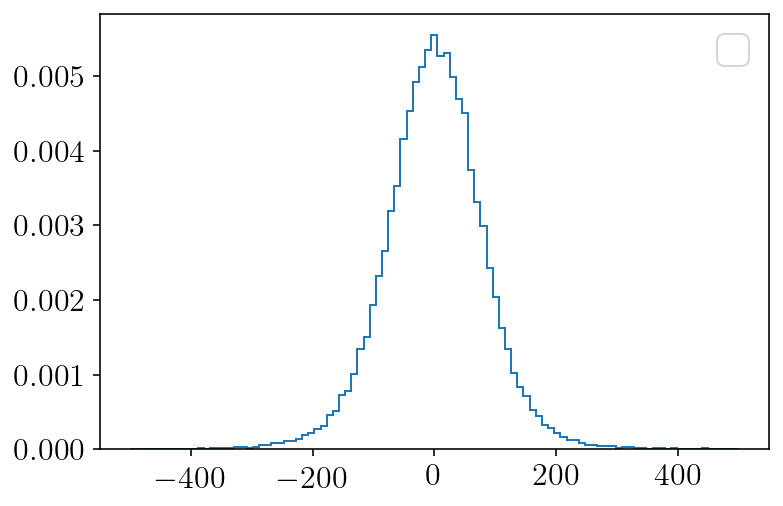

In [7]:
giants = (dr3['flag_sp'] == 0) & (dr3['irfm_ebv'] < 0.15) & np.isfinite(dr3['irfm_teff']) & (dr3['teff'] > 4400) & (dr3['teff'] < 5200) & (dr3['logg'] > 2.2)& (dr3['logg'] < 2.6)
perc = np.round(np.percentile(dr3['teff'][giants]-dr3['irfm_teff'][giants],q=[16,50,84]))
plt.hist(dr3['teff'][giants]-dr3['irfm_teff'][giants],bins=np.linspace(-500,500,100),histtype='step',density=True)
plt.legend()
print(r'RC: $'+str(int(perc[1]))+'_{-'+str(int(perc[1]-perc[0]))+'}^{+'+str(int(perc[2]-perc[1]))+'}$')

4250: $-74_{-165}^{+146}$
4500: $-8_{-133}^{+138}$
4750: $-43_{-113}^{+116}$
5000: $-62_{-111}^{+94}$
5250: $-74_{-114}^{+114}$
5500: $-88_{-117}^{+121}$
5750: $-86_{-116}^{+124}$
6000: $-96_{-117}^{+132}$
6250: $-107_{-122}^{+143}$
6500: $-128_{-140}^{+164}$
6750: $-125_{-176}^{+184}$
7000: $-85_{-201}^{+203}$


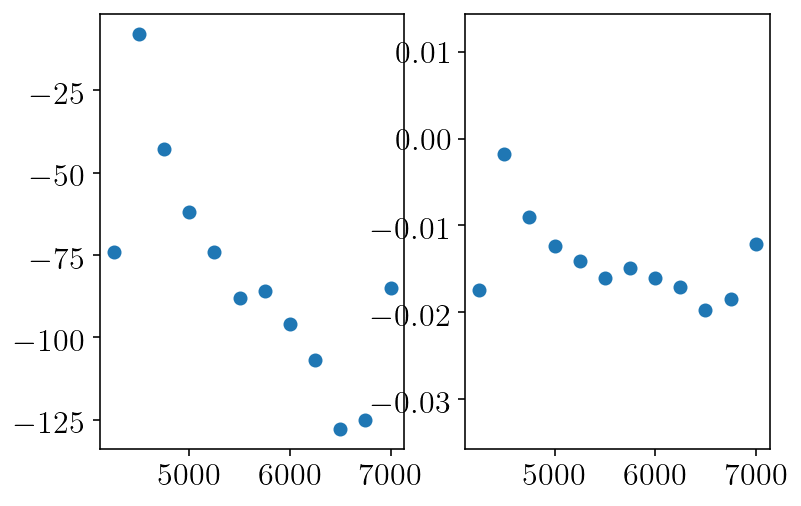

In [10]:
x1 = np.isfinite(dr3['irfm_teff']) &(dr3['irfm_ebv'] < 0.1) & (dr3['teff'] >= 4500-125) & (dr3['teff'] <= 7125) & ((dr3['logg'] > 3.5) | (dr3['teff'] > 5500))
x2 = np.isfinite(dr3['irfm_teff'])&(dr3['irfm_ebv'] < 0.1) &  ((dr3['logg'] > 3.5) | (dr3['teff'] > 5500))
print('Percentage of dwarfs within chosen TEFF range:')
print(100*len(dr3['teff'][x1])/len(dr3['teff'][x2]))

perc = np.percentile(((dr3['teff'][x1]-dr3['irfm_teff'][x1])/dr3['teff'][x1]),q=[16,50,84])
print(r'$'+str(perc[1])+'_{-'+str(perc[1]-perc[0])+'}^{+'+str(perc[2]-perc[1])+'}$')

teffs = np.arange(4250,7126,250)
teff_diffs = []

for teff_bin in teffs:
    in_bin = (
        (dr3['flag_sp'] == 0) & (dr3['irfm_ebv'] < 0.1) & 
        np.isfinite(dr3['irfm_teff']) &
        (
            (dr3['logg'] >= 3.5) |
            (dr3['teff'] >= 5500)
        ) &
        (np.abs(dr3['teff'] - teff_bin) <= teff_steps/2.)
    )
    perc = np.round(np.percentile(dr3['teff'][in_bin]-dr3['irfm_teff'][in_bin],q=[16,50,84]))
    teff_diffs.append(perc)
    print(str(teff_bin)+r': $'+str(int(perc[1]))+'_{-'+str(int(perc[1]-perc[0]))+'}^{+'+str(int(perc[2]-perc[1]))+'}$')

In [11]:
def plot_density(x, y, bins=100, range=None, normed=False, weights=None, 
                 scaling=None, reduce_fn='sum', smooth=0, ax=None, cmin=0, **kwargs):
    """
    Compute the bi-dimensional histogram of two data samples.

    Parameters
    ----------
    x : array_like, shape (N,)
        An array containing the x coordinates of the points to be
        histogrammed.
    y : array_like, shape (N,)
        An array containing the y coordinates of the points to be
        histogrammed.
    bins : int or array_like or [int, int] or [array, array], optional
        The bin specification:

        * If int, the number of bins for the two dimensions (nx=ny=bins).
        * If array_like, the bin edges for the two dimensions
            (x_edges=y_edges=bins).
        * If [int, int], the number of bins in each dimension
            (nx, ny = bins).
        * If [array, array], the bin edges in each dimension
            (x_edges, y_edges = bins).
        * A combination [int, array] or [array, int], where int
            is the number of bins and array is the bin edges.

    range : array_like, shape(2,2), optional
        The leftmost and rightmost edges of the bins along each dimension
        (if not specified explicitly in the `bins` parameters):
        ``[[xmin, xmax], [ymin, ymax]]``. All values outside of this range
        will be considered outliers and not tallied in the histogram.
    normed : bool, optional
        If False, returns the number of samples in each bin. If True,
        returns the bin density ``bin_count / sample_count / bin_area``.
    weights : array_like, shape(N,), optional
        An array of values ``w_i`` weighing each sample ``(x_i, y_i)``.
        Weights are normalized to 1 if `normed` is True. If `normed` is
        False, the values of the returned histogram are equal to the sum of
        the weights belonging to the samples falling into each bin.
    """
    import pylab as plt
    from scipy.ndimage import gaussian_filter

    ind = (np.isfinite(x) & np.isfinite(y))
    if False in ind:
        print("Warning: Not all values are finite.")
        w = weights
        if w is not None:
            w = w[ind]
        n, bx, by = plt.histogram2d(x[ind], y[ind], bins=bins, range=range, normed=normed,
                                    weights=w)
    else:
        n, bx, by = plt.histogram2d(x, y, bins=bins, range=range, normed=normed,
                                    weights=weights)

    if reduce_fn.lower() in ('average', 'mean', 'avg'):
        n0, _, _ = plt.histogram2d(x, y, bins=bins, range=range, normed=normed,
                                   weights=None)
        
        cmin_limit = (n0 < cmin)
        ind = n0 > 0
        n = n.astype(float)
        n[ind] /= n0[ind].astype(float)
    n[(n==0)] = np.nan
    n[cmin_limit] = np.nan

    defaults = dict(zorder = 2, cmap='RdYlBu_r', origin='lower', aspect='auto', rasterized=True,
                    interpolation='nearest')
    defaults.update(**kwargs)
    extent = (bx[0], bx[-1], by[0], by[-1])

    if smooth > 0:
        gaussian_filter(n, smooth, output=n)

    if ax==None:
        ax = plt.gca()
    else:
        ax=ax
        
    if scaling is None:
        scaling = 'None'
    s = scaling.lower().replace(' ', '')
    if s in (None, 'none', 'count'):
        return ax.imshow(n.T, extent=extent, **defaults)#, n
    else:
        if s in ('log', 'log(n)', 'log10', 'log(count)'):
            return ax.imshow(np.log10(n).T, extent=extent, **defaults)#, np.log10(n)
        elif s in ('log(n+1)', 'log(count+1)'):
            return ax.imshow(np.log10(n + 1).T, extent=extent, **defaults)#, np.log10(n + 1)

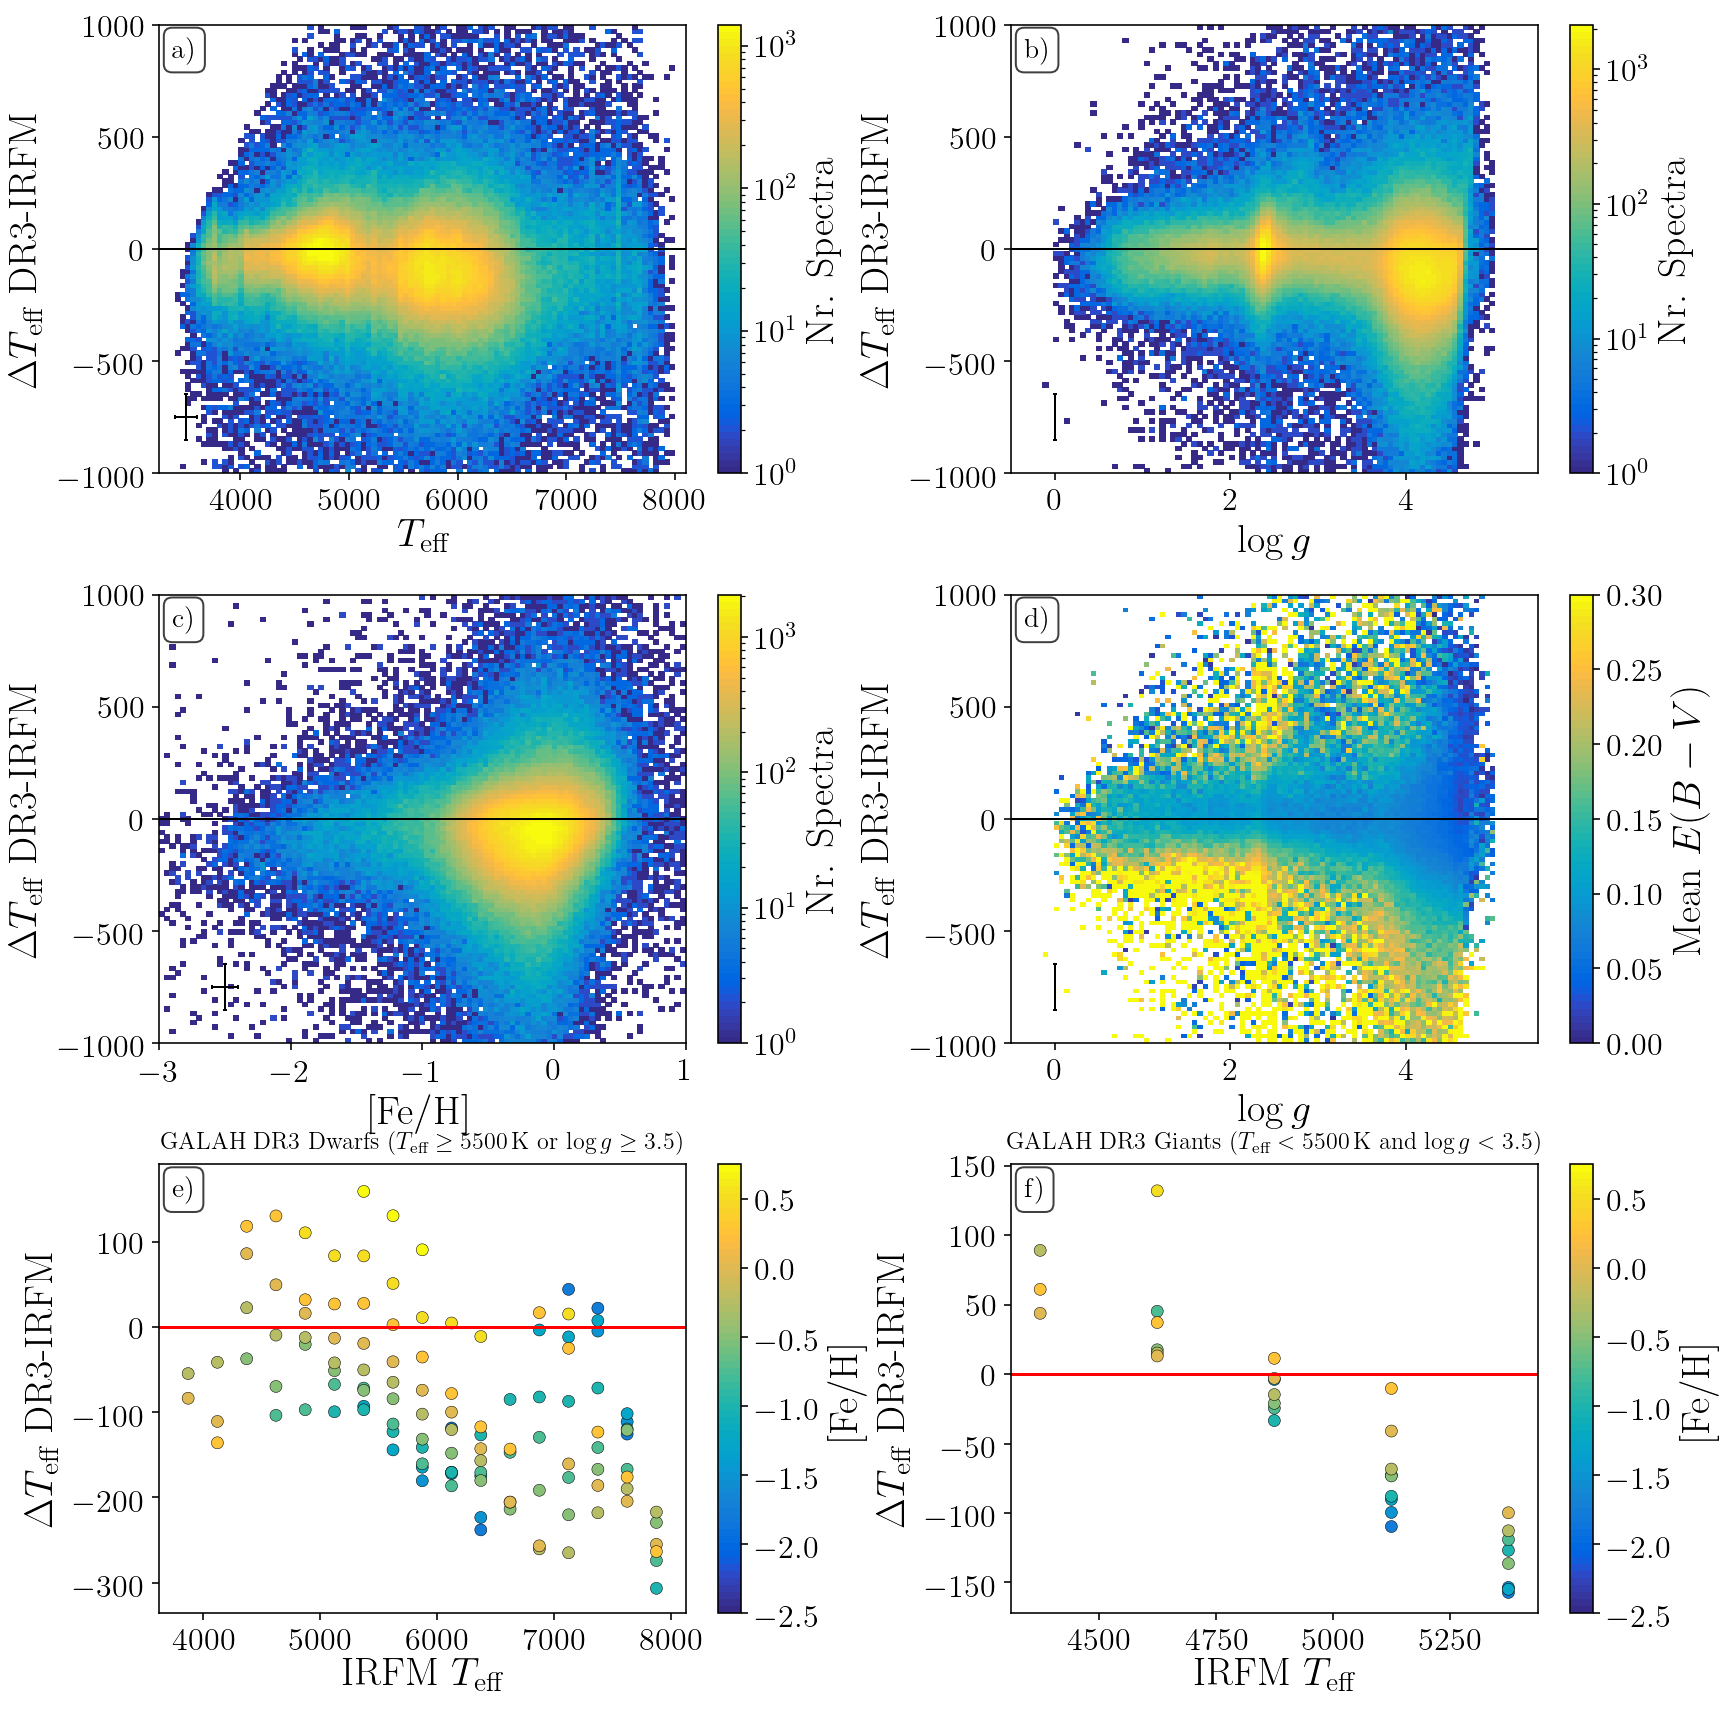

In [74]:
def plot_irfm():
    """
    We plot 4 panels
    a) Teff GALAH vs. delta IRFM-GALAH
    b) logg GALAH vs. delta IRFM-GALAH
    c) [Fe/H] GALAH vs. delta IRFM-GALAH
    d) logg GALAH vs. delta IRFM-GALAH colored by mean E(B-V)
    """
    
    fig, ((ax1, ax2), (ax4, ax3), (ax5, ax6)) = plt.subplots(3,2, figsize=(12,12))
    
    teff_bins = (3250,8100)
    logg_bins = (-0.5,5.5)
    dteff_bins = 1000
    
    good_galah = np.isfinite(dr3['irfm_teff']) & np.isfinite(dr3['e_teff'])

    kwargs_hist = dict(cmap=parula,cmin=1)

    p,x,y,s1 = ax1.hist2d(
        dr3['teff'][good_galah],
        dr3['teff'][good_galah] - dr3['irfm_teff'][good_galah],
        norm=LogNorm(),
        bins=(np.linspace(teff_bins[0],teff_bins[1],100),np.linspace(-dteff_bins,dteff_bins,100)),
        **kwargs_hist
    )
    
    p,x,y,s2 = ax2.hist2d(
        dr3['logg'][good_galah],
        dr3['teff'][good_galah] - dr3['irfm_teff'][good_galah],
        norm=LogNorm(),
        bins=(np.linspace(logg_bins[0],logg_bins[1],100),np.linspace(-dteff_bins,dteff_bins,100)),
        **kwargs_hist
    )
    
    s3 = plot_density(
        dr3['logg'][good_galah],
        dr3['teff'][good_galah] - dr3['irfm_teff'][good_galah],
        weights = dr3['irfm_ebv'][good_galah],
        ax = ax3,vmin=0,vmax=0.3,
        reduce_fn='mean',
        bins = (
            np.linspace(logg_bins[0],logg_bins[1],100),
            np.linspace(-dteff_bins,dteff_bins,100),
        ),
        cmap = parula,
        cmin = 1,
        rasterized = True,
        zorder=2
        )
    
    p,x,y,s4 = ax4.hist2d(
        dr3['fe_h'][good_galah],
        dr3['teff'][good_galah] - dr3['irfm_teff'][good_galah],
        norm=LogNorm(),
        bins=(np.linspace(-3,1,100),np.linspace(-dteff_bins,dteff_bins,100)),
        **kwargs_hist
    )

    c1 = plt.colorbar(s1,ax=ax1)
    c1.set_label('Nr. Spectra')
    c2 = plt.colorbar(s2,ax=ax2)
    c2.set_label('Nr. Spectra')
    c3 = plt.colorbar(s3,ax=ax3)
    c3.set_label(r'Mean $E(B-V)$')
    c4 = plt.colorbar(s4,ax=ax4)
    c4.set_label('Nr. Spectra')
    
    ax1.set_xlabel(r'$T_\text{eff}$')
    ax1.set_ylabel(r'$\Delta T_\text{eff}$ DR3-IRFM')
    ax2.set_xlabel(r'$\log g$')
    ax2.set_ylabel(r'$\Delta T_\text{eff}$ DR3-IRFM')
    ax3.set_xlabel(r'$\log g$')
    ax3.set_ylabel(r'$\Delta T_\text{eff}$ DR3-IRFM')
    ax4.set_xlabel(r'$\mathrm{[Fe/H]}$')
    ax4.set_ylabel(r'$\Delta T_\text{eff}$ DR3-IRFM')
    
    props = dict(boxstyle='round', facecolor='w', alpha=0.75)
    ax1.text(0.025, 0.975, 'a)', transform=ax1.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    ax2.text(0.025, 0.975, 'b)', transform=ax2.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    ax4.text(0.025, 0.975, 'c)', transform=ax4.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    ax3.text(0.025, 0.975, 'd)', transform=ax3.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    ax5.text(0.025, 0.975, 'e)', transform=ax5.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    ax6.text(0.025, 0.975, 'f)', transform=ax6.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

    kwargs = dict(lw=1,c='k',zorder=3)
    for each in [0]:
        ax1.axhline(each,**kwargs)
        ax2.axhline(each,**kwargs)
        ax3.axhline(each,**kwargs)
        ax4.axhline(each,**kwargs)

    ax1.errorbar(
        3500,-0.75*dteff_bins,
        xerr = np.mean(dr3['e_teff'][good_galah]),
        yerr = np.mean(dr3['e_teff'][good_galah]),
        c='k',fmt='none',lw=1,capsize=1
    )
    ax2.errorbar(
        0,-0.75*dteff_bins,
        xerr = np.mean(dr3['e_logg'][good_galah]),
        yerr = np.mean(dr3['e_teff'][good_galah]),
        c='k',fmt='none',lw=1,capsize=1
    )
    ax3.errorbar(
        0,-0.75*dteff_bins,
        xerr = np.mean(dr3['e_logg'][good_galah]),
        yerr = np.mean(dr3['e_teff'][good_galah]),
        c='k',fmt='none',lw=1,capsize=1
    )
    ax4.errorbar(
        -2.5,-0.75*dteff_bins,
        xerr = np.mean(dr3['e_fe_h'][good_galah]),
        yerr = np.mean(dr3['e_teff'][good_galah]),
        c='k',fmt='none',lw=1,capsize=1
    )
    
    teff_bin = 250; feh_bin = 0.25

    teffs = np.arange(3125,8000,teff_bin)
    fehs  = np.arange(-2.5,1.0,feh_bin)

    # dwarfs:
    for i_feh,each_feh in enumerate(fehs):
        points = []
        for each_teff in teffs:

            in_bin = (
                np.isfinite(dr3['irfm_teff']) &
                (dr3['irfm_ebv'] < 0.15) &
                ((dr3['teff'] >= 5500) | (dr3['logg'] >= 3.5))&
                (np.abs(dr3['irfm_teff']-each_teff)<=teff_bin/2.) &
                (np.abs(dr3['logg']-each_logg)<=logg_bin/2.) &
                (np.abs(dr3['fe_h']-each_feh)<=feh_bin/2.)
            )
            if len(dr3['teff'][in_bin]) > 50:
                perc = np.percentile(((dr3['teff'][in_bin]-dr3['irfm_teff'][in_bin])),q=[16,50,84])
                points.append(perc[1])
            else:
                points.append(np.nan)

        s = ax5.scatter(
            teffs,
            np.array(points),
            #marker='o',,
            edgecolors='k',lw=0.25,
            c=[each_feh for x in range(len(teffs))],
            cmap=parula,
            vmin=fehs[0],vmax=fehs[-1]
        )
    c1 = plt.colorbar(s,ax=ax5)
    c1.set_label('[Fe/H]')
    # giants:
    teffs = np.arange(3125,5500,teff_bin)
    for i_feh,each_feh in enumerate(fehs):
        points = []
        for each_teff in teffs:

            in_bin = (
                np.isfinite(dr3['irfm_teff']) &
                (dr3['irfm_ebv'] < 0.15) &
                ((dr3['teff'] < 5500) & (dr3['logg'] < 3.5))&
                (np.abs(dr3['irfm_teff']-each_teff)<=teff_bin/2.) &
                (np.abs(dr3['logg']-each_logg)<=logg_bin/2.) &
                (np.abs(dr3['fe_h']-each_feh)<=feh_bin/2.)
            )
            if len(dr3['teff'][in_bin]) > 50:
                perc = np.percentile(((dr3['teff'][in_bin]-dr3['irfm_teff'][in_bin])),q=[16,50,84])
                points.append(perc[1])
            else:
                points.append(np.nan)
        s = ax6.scatter(
            teffs,
            np.array(points),
            #marker='o',
            c=[each_feh for x in range(len(teffs))],
            cmap=parula,
            edgecolors='k',lw=0.25,
            vmin=fehs[0],vmax=fehs[-1]
        )
    c2 = plt.colorbar(s,ax=ax6)
    c2.set_label('[Fe/H]')
    ax5.axhline(0,c='r')
    ax6.axhline(0,c='r')
    ax5.set_xlabel(r'IRFM $T_\text{eff}$')
    ax5.set_ylabel(r'$\Delta T_\text{eff}$ DR3-IRFM')
    ax5.set_title(r'GALAH DR3 Dwarfs ($T_\text{eff} \geq 5500\,\mathrm{K}$ or $\log g \geq 3.5$)')
    ax6.set_xlabel(r'IRFM $T_\text{eff}$')
    ax6.set_ylabel(r'$\Delta T_\text{eff}$ DR3-IRFM')
    ax6.set_title(r'GALAH DR3 Giants ($T_\text{eff} < 5500\,\mathrm{K}$ and $\log g < 3.5$)')

    plt.tight_layout(h_pad=0)

    return(fig)

fig = plot_irfm()
fig.savefig('../../../dr3_release_paper/figures/plot_irfm.png',dpi=200,bbox_inches='tight')